<a href="https://colab.research.google.com/github/fikrifaizz/customer-retention-analytics/blob/main/notebooks/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats

In [9]:
data = pd.read_csv('../data/processed/rfm_result.csv')
data.head(5)

,customer_id,recency_days,frequency_count,monetary_value,r_score,f_score,m_score,rfm_segment
0,14646,1,73,280206.02,5,5,5,555
1,18102,0,60,259657.30,5,5,5,555
2,17450,8,46,194390.79,5,5,5,555
3,16446,0,2,168472.50,5,2,5,525
4,14911,1,201,143711.17,5,5,5,555


In [10]:
data.describe()

,customer_id,recency_days,frequency_count,monetary_value,r_score,f_score,m_score,rfm_segment
count,4338.000000,4338.000000,4338.000000,4338.00000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.059474,4.272015,2048.68808,2.999308,2.999308,2.999308,332.923237
std,1721.808492,100.012264,7.697998,8985.23022,1.414295,1.414295,1.414295,150.043810
min,12346.000000,0.000000,1.000000,3.75000,1.000000,1.000000,1.000000,111.000000
25%,13813.250000,17.000000,1.000000,306.48250,2.000000,2.000000,2.000000,222.000000
50%,15299.500000,50.000000,2.000000,668.57000,3.000000,3.000000,3.000000,333.000000
75%,16778.750000,141.750000,5.000000,1660.59750,4.000000,4.000000,4.000000,454.000000
max,18287.000000,373.000000,209.000000,280206.02000,5.000000,5.000000,5.000000,555.000000


In [11]:
features = ["recency_days", "frequency_count", "monetary_value"]
X = data[features].copy()

# Recency + 1 (agar yg baru belanja hari ini/0 hari tidak error)
X['recency_days'] = X['recency_days'] + 1 
# Monetary: Pastikan tidak ada angka <= 0 (jika ada, ganti dengan 1 dolar)
X['monetary_value'] = X['monetary_value'].apply(lambda x: x if x > 0 else 1)

X_log = np.log(X)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)
X_scaled = pd.DataFrame(X_scaled, columns=features)

X_scaled.head()

,recency_days,frequency_count,monetary_value
0,-2.246473,3.714871,4.722173
1,-2.747497,3.497134,4.661804
2,-1.159289,3.202137,4.432343
3,-2.747497,-0.279044,4.318919
4,-2.246473,4.839382,4.192916


/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fikrifaizzulfadhli/

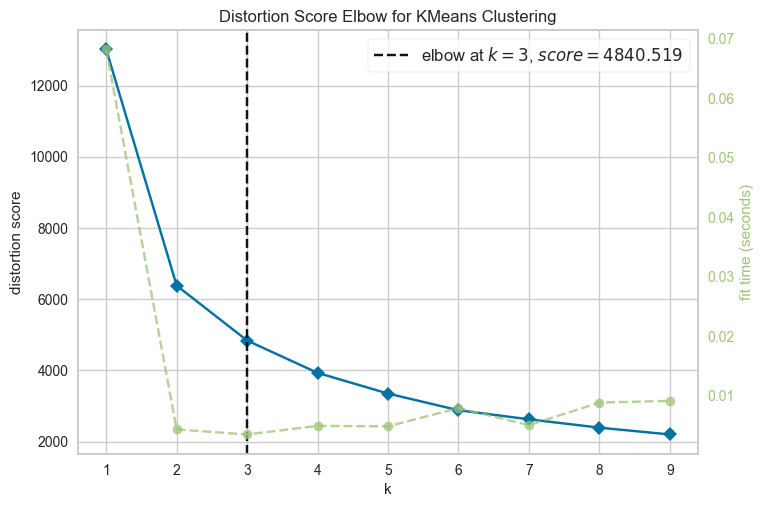

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_scaled)
visualizer.show()

In [16]:
# Fit Model
k_best = 3
model = KMeans(n_clusters=k_best, random_state=42)
data['Cluster'] = model.fit_predict(X_scaled)

# Cek profil setiap cluster (Rata-rata)
summary = data.groupby('Cluster')[features].mean()
summary['Count'] = data['Cluster'].value_counts()
print(summary)

         recency_days  frequency_count  monetary_value  Count
Cluster                                                      
0          161.904455         1.281804      343.593301   1863
1           51.704666         3.507383     1352.627165   1693
2           13.030691        13.051151     7617.770818    782


/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fikrifaizzulfadhli/Python Interpreter/Python 3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/fikrifaizzulfadhli/

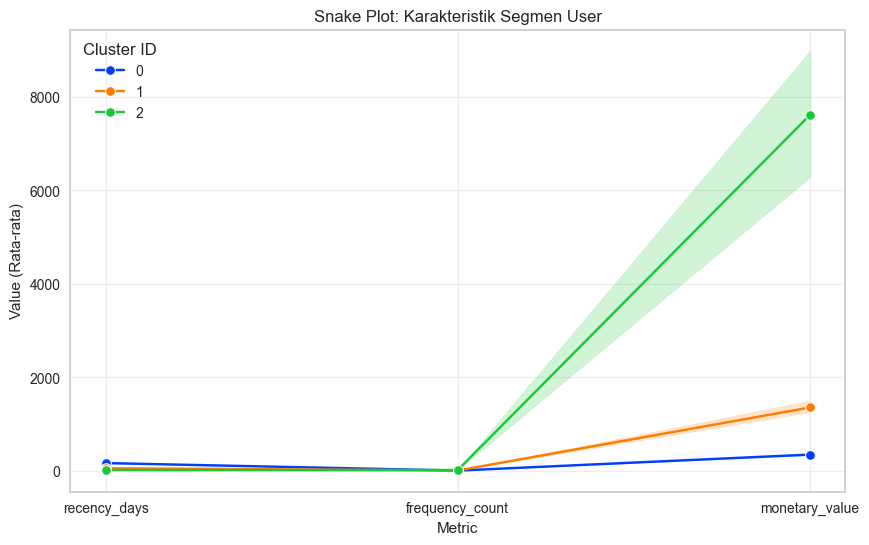

In [17]:
# 1. Siapkan Data untuk Plotting
# Kita butuh data asli (bukan log) tapi ditambah label Cluster
data['Cluster'] = model.labels_

# Melt data menjadi format panjang (Long Format) agar bisa di-plot seaborn
df_melt = pd.melt(
    data.reset_index(), 
    id_vars=['Cluster'], 
    value_vars=['recency_days', 'frequency_count', 'monetary_value'], 
    var_name='Metric', 
    value_name='Value'
)

# 2. Plotting
plt.figure(figsize=(10, 6))

# Kita gunakan Lineplot untuk melihat "Bentuk Ular" dari setiap cluster
sns.lineplot(data=df_melt, x='Metric', y='Value', hue='Cluster', palette='bright', marker="o")

plt.title('Snake Plot: Karakteristik Segmen User')
plt.xlabel('Metric')
plt.ylabel('Value (Rata-rata)')
plt.legend(title='Cluster ID')
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
# Simpan ke CSV final
output_file = '../data/processed/rfm_segmented_final.csv'
data.to_csv(output_file, index=False)
print(f"Data segmentasi berhasil disimpan di: {output_file}")

Data segmentasi berhasil disimpan di: ../data/processed/rfm_segmented_final.csv


In [21]:
# Cluster 2 (Champions) vs Cluster 1 (Potential/Loyal)
cluster_champions = data[data['Cluster'] == 2]['monetary_value']
cluster_potential = data[data['Cluster'] == 1]['monetary_value']

# Lakukan T-Test (Independent Sample)
t_stat, p_val = stats.ttest_ind(cluster_champions, cluster_potential)

print(f"--- T-TEST RESULTS (Champions vs Potential) ---")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.10f}") 

# Interpretasi
alpha = 0.05
if p_val < alpha:
    print("\nHASIL: Signifikan!")
    print("Kita bisa menolak H0. Rata-rata belanja kedua grup ini BERBEDA secara nyata (bukan kebetulan).")
    print("Strategi marketing yang berbeda WAJIB diterapkan.")
else:
    print("\nHASIL: Tidak Signifikan.")
    print("Tidak ada bukti kuat bahwa kedua grup ini berbeda.")

--- T-TEST RESULTS (Champions vs Potential) ---
T-Statistic: 12.75
P-Value: 0.0000000000

HASIL: Signifikan!
Kita bisa menolak H0. Rata-rata belanja kedua grup ini BERBEDA secara nyata (bukan kebetulan).
Strategi marketing yang berbeda WAJIB diterapkan.
